In [1]:
%run utils.ipynb

In [2]:
%matplotlib inline
#%matplotlib notebook

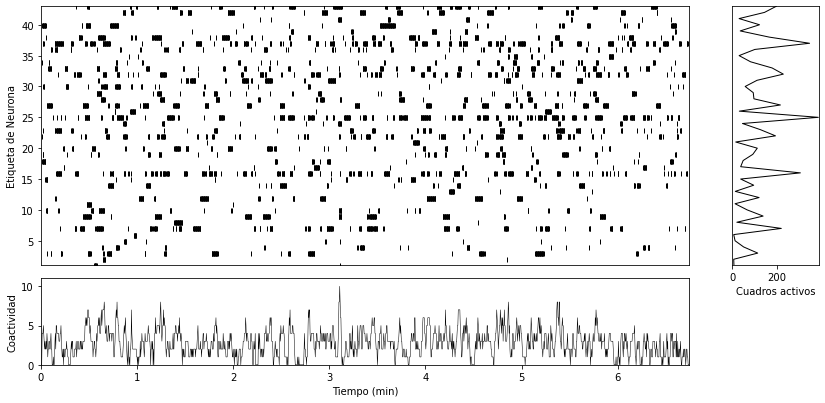

In [3]:
fps=4
raster = np.load("../data/f6_4_raster.npy").T
raster=np.delete(raster, np.where(np.sum(raster,axis=1)==0)[0],axis=0).copy()
plot_raster(raster,fps)
#plt.savefig('../figures/raster.svg', format='svg', dpi=300, transparent=True)

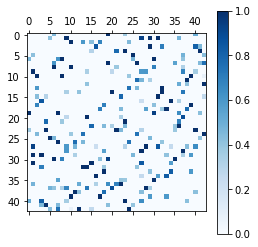

In [4]:
mapper = umap.UMAP(n_neighbors=5,min_dist=0.1,n_components=3,random_state=42,metric='correlation',).fit(raster)
ma=get_adj_matrix(mapper)
plt.matshow(ma,cmap='Blues')
plt.colorbar()
#plt.savefig('../figures/adj_matrix.svg', format='svg', dpi=300, transparent=True)
plt.show()

In [5]:
cluster_index,mat_mismo_grupo=get_clusters_modularidad(ma,n_iter=1000)

Number of Ensembles:  6


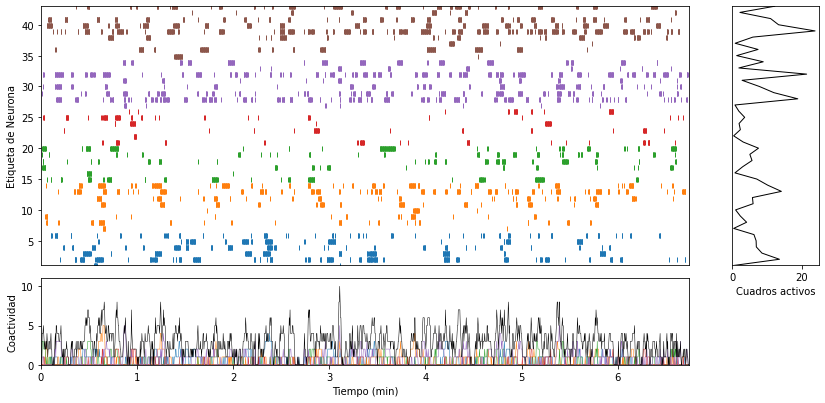

In [12]:
ord_plot_ch=plot_cluster_raster(raster,fps,cluster_index,name_colormap='tab10')
#plt.savefig('../figures/ensamble_raster.svg', format='svg', dpi=300,transparent=True)

In [13]:
test_coactivity_is_random(raster,cluster_index,1000)

Cluster 0
rt = -29.833159567699084
p = 1.451875165320464e-195
alphahat 0.0
betahat 0.0

Cluster 1
rt = -28.36225424506459
p = 5.910548852450992e-177
alphahat 0.0
betahat 0.0

Cluster 2
rt = -31.128263621912527
p = 9.987055626028005e-213
alphahat 0.0
betahat 0.0

Cluster 3
rt = -28.40577319600204
p = 1.7159498179387344e-177
alphahat 0.0
betahat 0.0

Cluster 4
rt = -28.79819978497437
p = 2.2592323711309888e-182
alphahat 0.044
betahat 0.0

Cluster 5
rt = -30.971863023735978
p = 1.2902160389354223e-210
alphahat 0.05
betahat 0.0



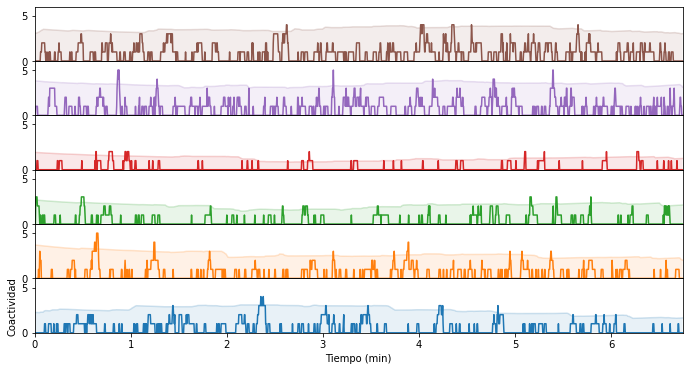

In [14]:
plot_coactivity_ensambles(raster,cluster_index,1000,'tab10',fps,20,3)
#plt.savefig('../figures/coactivity_ensamble_rasters.svg', format='svg', dpi=300,transparent=True)

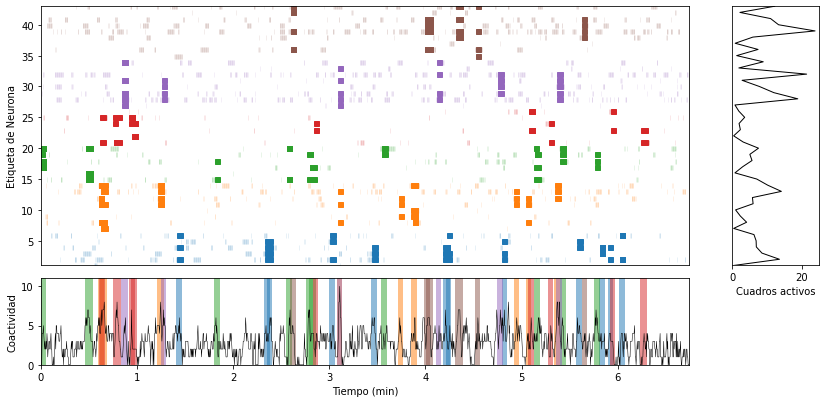

In [15]:
ord_plot_ch,ensembles_in_time=plot_ensamble_raster(raster,fps,cluster_index,'tab10',3,20,5)
#plt.savefig('../figures/ensamble_raster.svg', format='svg', dpi=300,transparent=True)

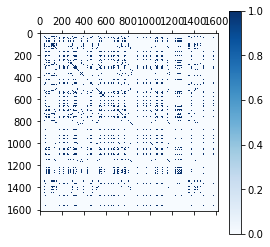

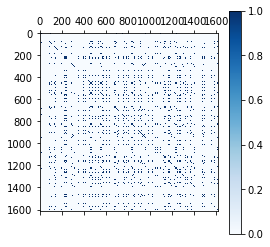

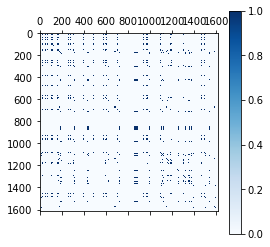

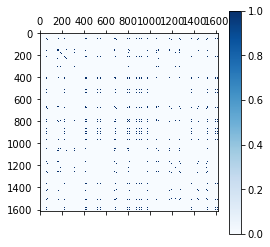

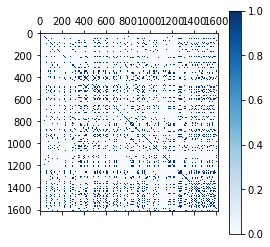

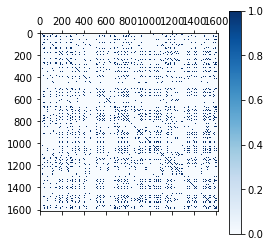

In [16]:
df=get_recurrence_analysis(raster,cluster_index)

(0.0, 30.0)

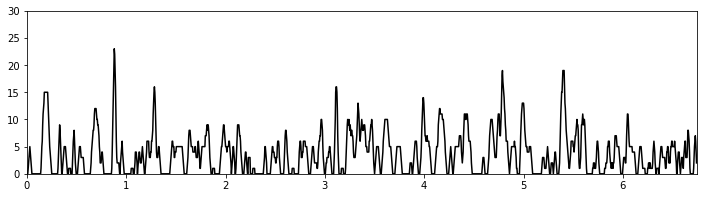

In [18]:
recurrence_matrix=plot_rate(raster,cluster_index,4,bin_=4,fps=4,r=3)
plt.ylim(0,30)
#plt.savefig('../figures/ensemble_rate.svg', format='svg', dpi=300,transparent=True)

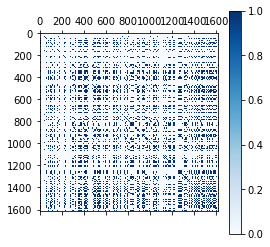

In [19]:
plt.matshow(recurrence_matrix,cmap='Blues')
plt.colorbar()
#plt.savefig('../figures/recurrence_matrix.svg', format='svg', dpi=300,transparent=True)